In [1]:
from langgraph.graph import START,END,StateGraph
from dotenv import load_dotenv
from langchain_core.messages import HumanMessage
import os

In [7]:
from langchain.chat_models import init_chat_model
load_dotenv()
os.environ['GROQ_API_KEY'] = os.getenv("groq_api")

#Model Initialization:
groq_model = init_chat_model("groq:qwen/qwen3-32b")
groq_model.profile

{'max_input_tokens': 131072,
 'max_output_tokens': 16384,
 'image_inputs': False,
 'audio_inputs': False,
 'video_inputs': False,
 'image_outputs': False,
 'audio_outputs': False,
 'video_outputs': False,
 'reasoning_output': True,
 'tool_calling': True}

In [8]:
def multiply(a:int,b:int)->int:
    """Multiply the two numbers"""
    return a*b

llm_with_tools = groq_model.bind_tools([multiply])


In [9]:
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode, tools_condition
class MessagesState(MessagesState):
    pass

def tool_calling(state:MessagesState):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}


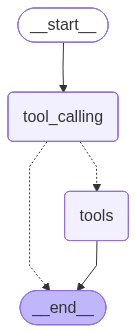

In [10]:
#Graph Creation:
builder = StateGraph(MessagesState)
builder.add_node("tool_calling", tool_calling)
builder.add_node("tools", ToolNode([multiply]))

builder.add_edge(START,"tool_calling")
builder.add_conditional_edges("tool_calling",tools_condition)
builder.add_edge("tools", END)
graph = builder.compile()
display(graph)

In [11]:
messages = [
    HumanMessage("What is 79 multiplied by 85")
]
messages = graph.invoke({"messages":messages})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 79 multiplied by 85
================================== Ai Message ==================================
Tool Calls:
  multiply (jxanc8s0g)
 Call ID: jxanc8s0g
  Args:
    a: 79
    b: 85
================================= Tool Message =================================
Name: multiply

6715
